In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
len(y_train)

60000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

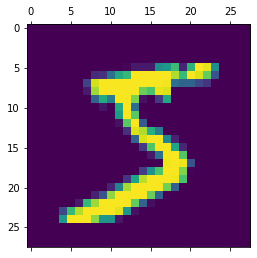

In [9]:
plt.matshow(x_train[0])

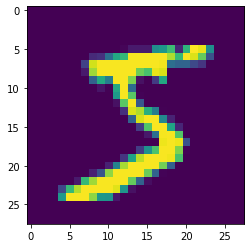

In [10]:
plt.imshow(x_train[0])

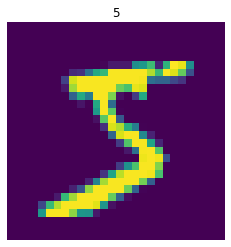

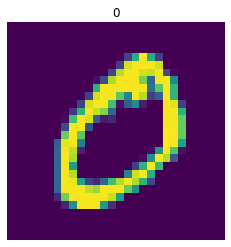

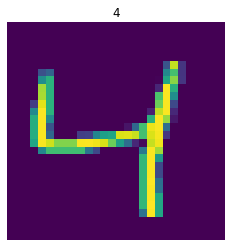

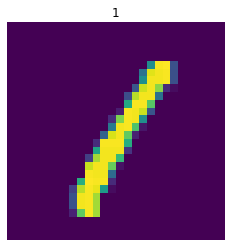

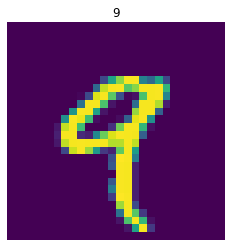

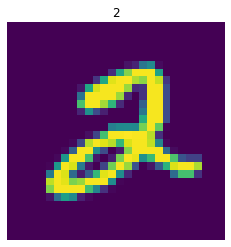

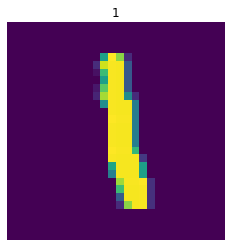

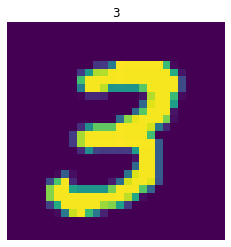

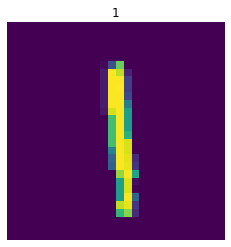

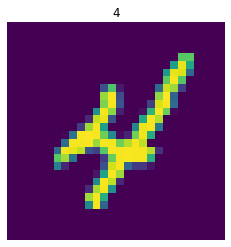

In [11]:
for i in range (0,10):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')])

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [16]:
model.fit(x_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4711 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9151: 0s - loss: 0.304
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9259


In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.9241


[0.27051734924316406, 0.9240999817848206]

In [18]:
y_pred = model.predict(x_test_flattened)

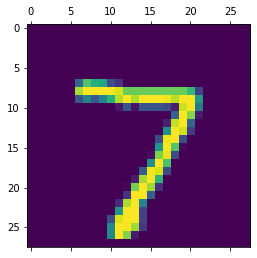

In [19]:
plt.matshow(x_test[0])

In [20]:
y_pred[0]

array([1.7612040e-02, 3.3054738e-07, 9.4465554e-02, 9.5604455e-01,
       2.1935701e-03, 1.2336916e-01, 2.4654071e-06, 9.9973327e-01,
       7.5647622e-02, 7.2952181e-01], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_pred_lables = [np.argmax(i) for i in y_pred]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    3,    2,    0,   10,   12,    2,    2,    1],
       [   0, 1113,    4,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  943,   13,    8,    5,   13,    8,   26,    4],
       [   2,    0,   24,  907,    0,   39,    3,    9,   14,   12],
       [   0,    1,    8,    1,  906,    1,   13,    4,    9,   39],
       [   7,    2,    3,   18,    6,  809,   16,    4,   19,    8],
       [   6,    3,    8,    1,    7,   12,  921,    0,    0,    0],
       [   1,    6,   28,    5,    8,    1,    0,  935,    1,   43],
       [   5,    9,    9,   24,    9,   51,   11,    9,  828,   19],
       [   9,    6,    3,   10,   25,    8,    0,   14,    3,  931]])>

In [24]:
import seaborn as sns

Text(69.0, 0.5, 'truth')

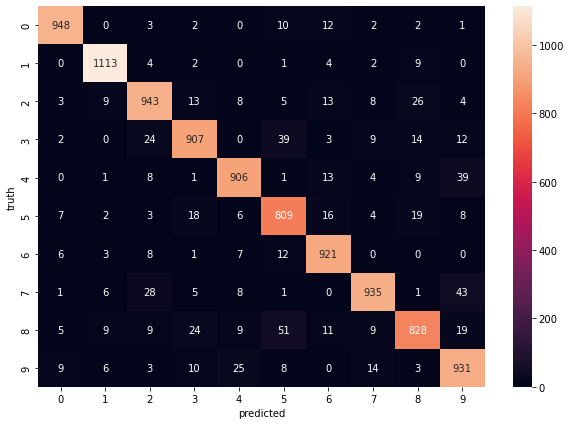

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [26]:
model2 = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
                           keras.Sequential([keras.layers.Dense(10, activation = 'sigmoid')])])

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
model2.fit(x_train_flattened, y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2744 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1222 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0849 - accuracy: 0.9750: 0s -
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9843


In [27]:
model2.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9764


[0.08109230548143387, 0.9764000177383423]

In [28]:
y_pred2 = model2.predict(x_test_flattened)

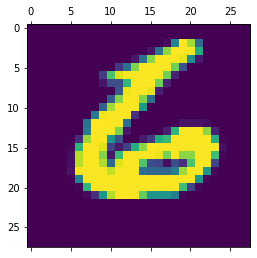

In [29]:
plt.matshow(x_test[9999])

In [37]:
np.argmax(y_pred2[9999])

6

In [31]:
import joblib

In [32]:
joblib.dump(model2, "model1/DeepLearning model")
    

INFO:tensorflow:Assets written to: ram://f6310cfe-c56b-4cb1-bb2c-cea9ff0d0e16/assets


NotFoundError: 

In [34]:
model2.save("DeepLearningModel1.h5")